In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('HR_Employee_Attrition_Data.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [8]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
data.shape

(2940, 35)

In [14]:
# replacing character to binary 1 and 0

from sklearn import preprocessing

def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['Attrition']= le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel']= le.fit_transform(res_df['BusinessTravel'])
    res_df['Department']= le.fit_transform(res_df['Department'])
    res_df['EducationField']= le.fit_transform(res_df['EducationField'])
    res_df['Gender']= le.fit_transform(res_df['Gender'])
    res_df['JobRole']= le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus']= le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime']= le.fit_transform(res_df['OverTime'])
    return res_df

In [15]:
encoded_df=preprocessor(data)
encoded_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,5,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,0,1,884,1,23,2,3,1,2936,...,3,80,1,17,3,3,5,2,0,3
2936,39,0,2,613,1,6,1,3,1,2937,...,1,80,1,9,5,3,7,7,1,7
2937,27,0,2,155,1,4,3,1,1,2938,...,2,80,1,6,0,3,6,2,0,3
2938,49,0,1,1023,2,2,3,3,1,2939,...,4,80,0,17,3,2,9,6,0,8


<AxesSubplot:>

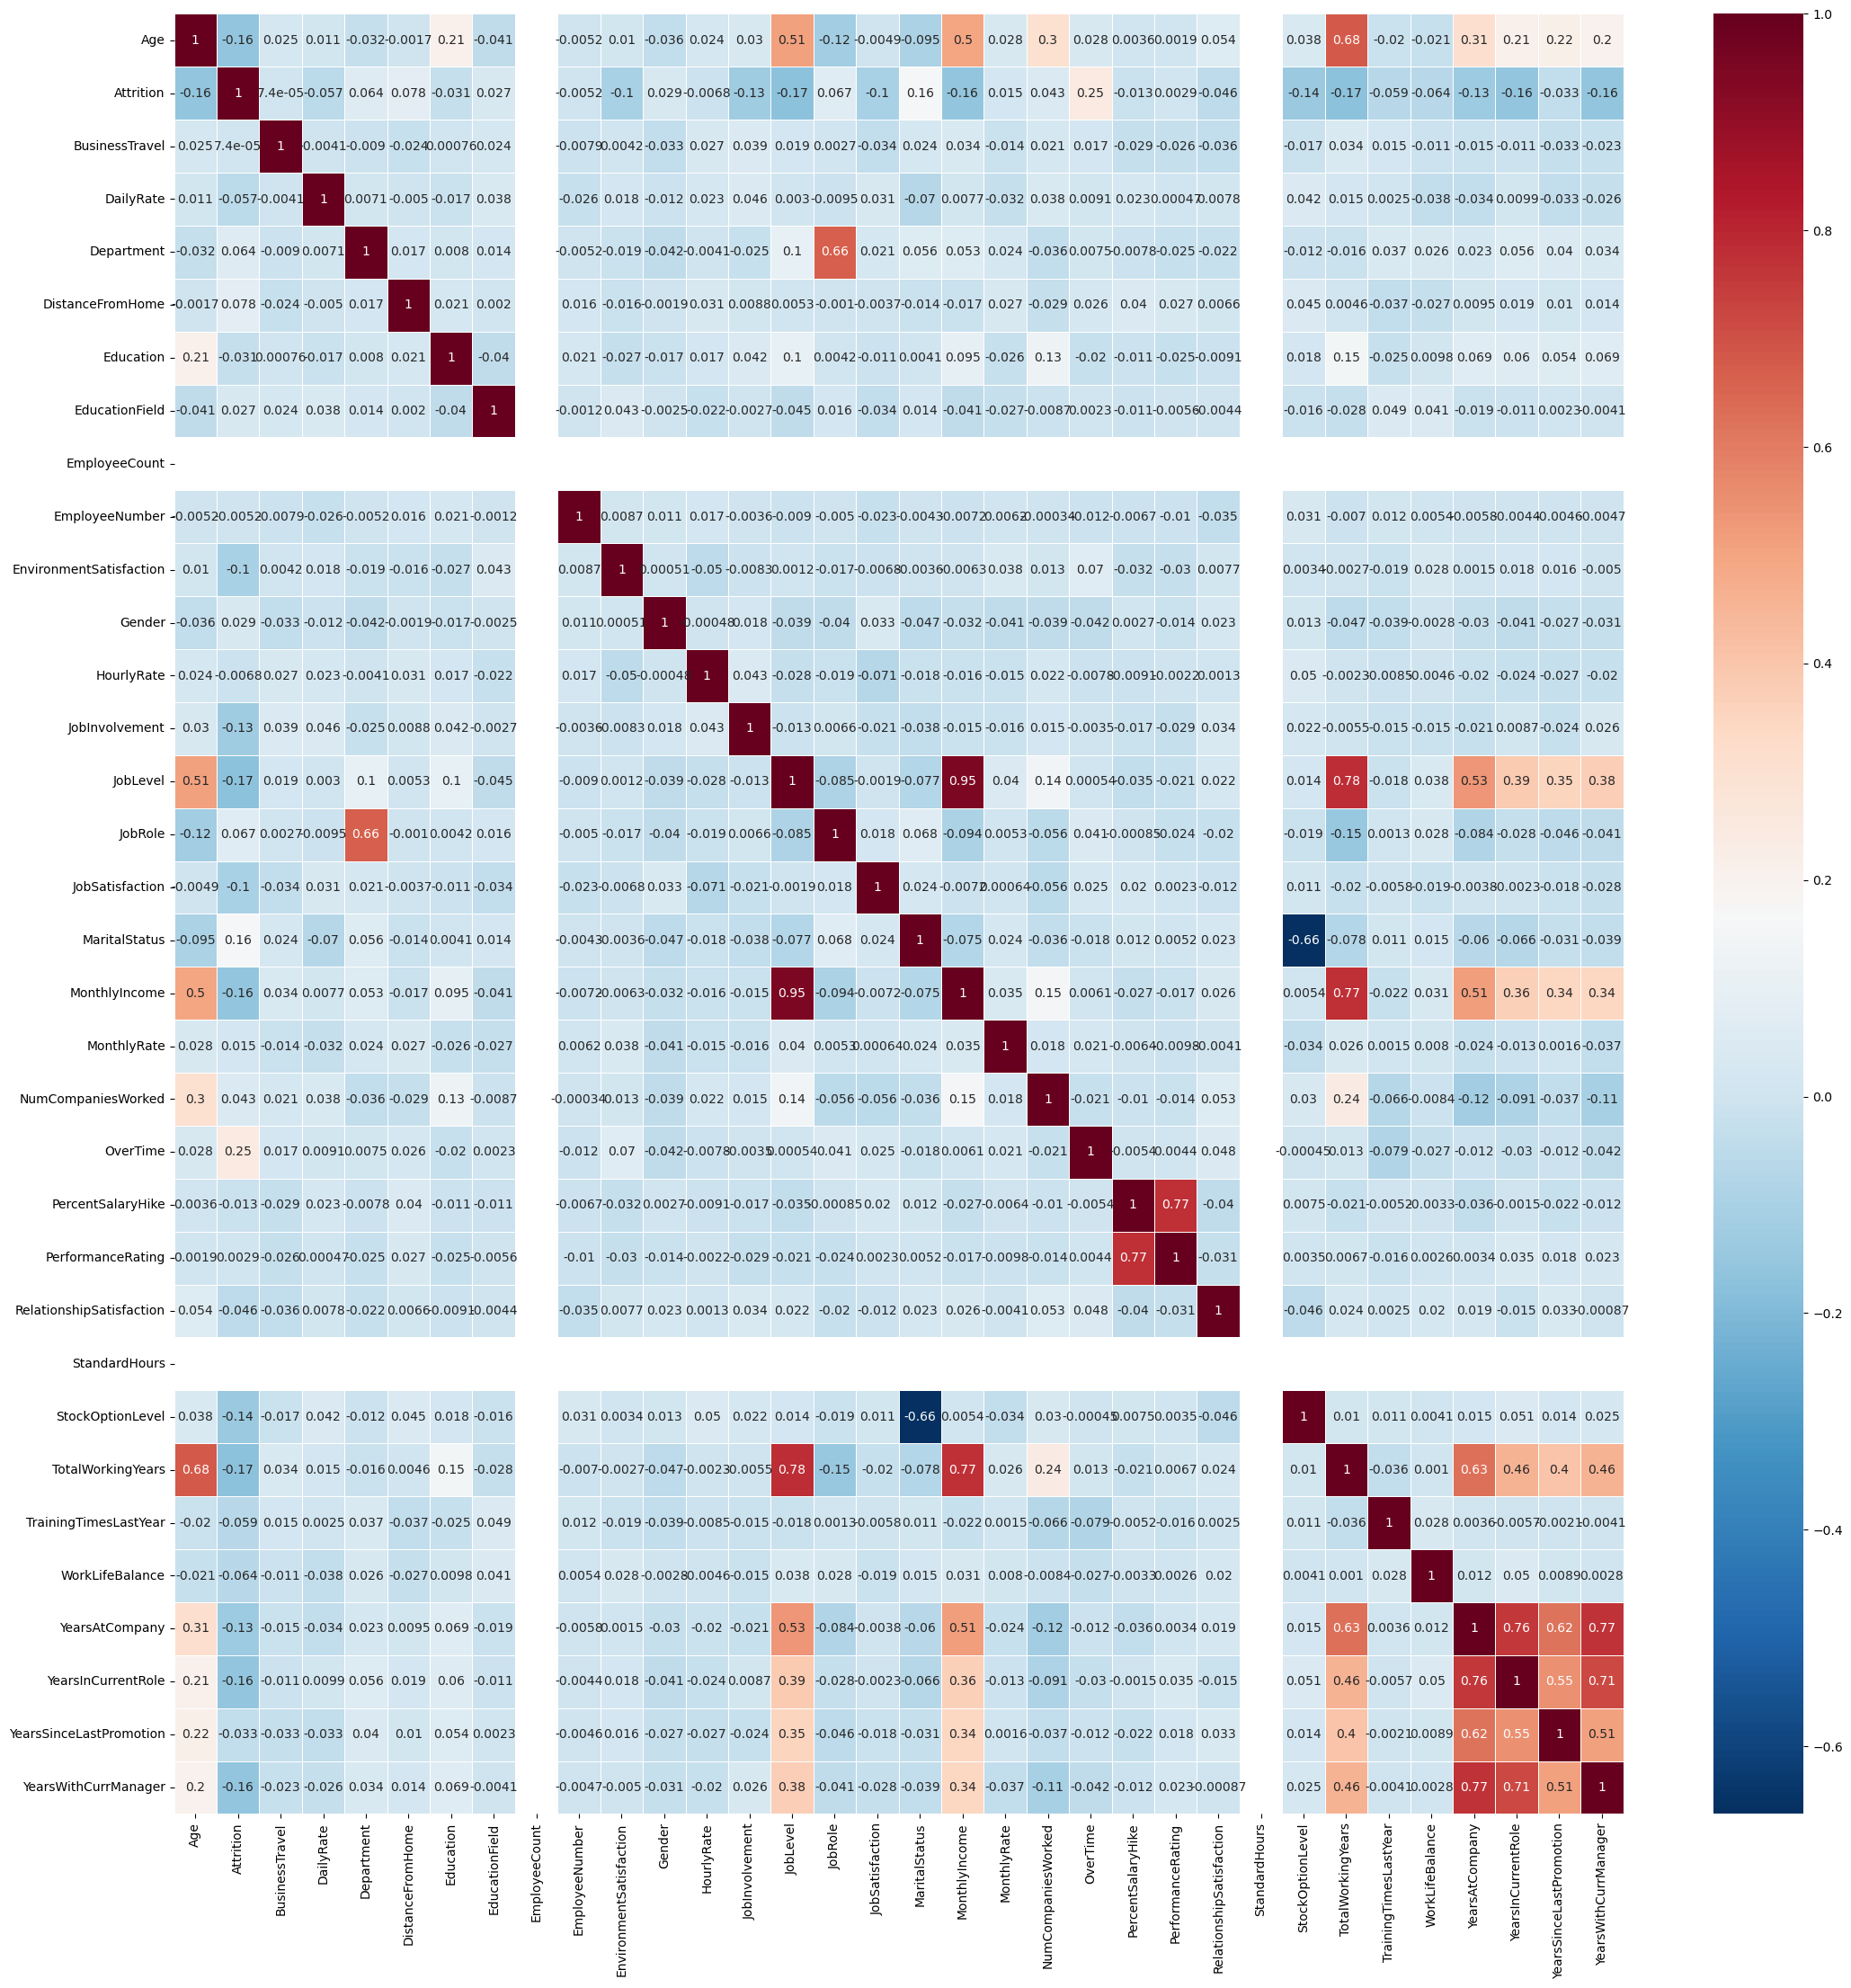

In [16]:
# After we changed all the categorical variables to numerical using mean encoding, 
# we can run pairwise correlation again to see the correlation between all the variables
pearson = encoded_df.corr(method='pearson')
pearson
plt.figure(figsize=(26, 26))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

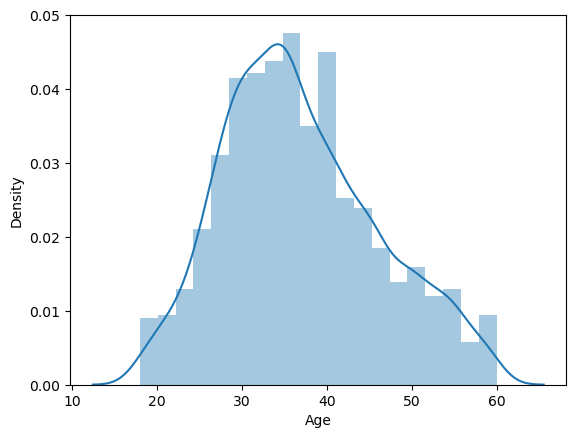

In [17]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(encoded_df.Age, bins=20)
plt.show()

<AxesSubplot:xlabel='Attrition', ylabel='Density'>

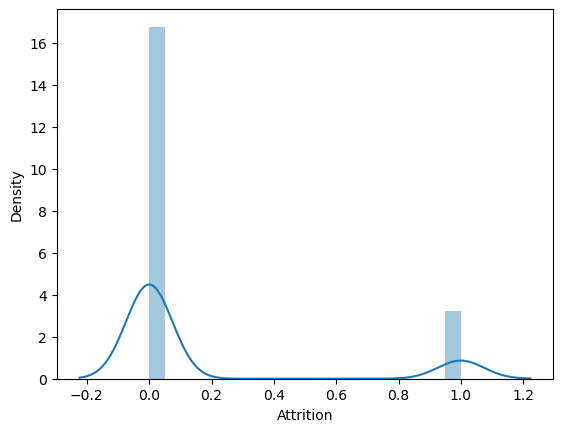

In [18]:
sns.distplot(encoded_df.Attrition, bins=20)

<AxesSubplot:xlabel='BusinessTravel', ylabel='Density'>

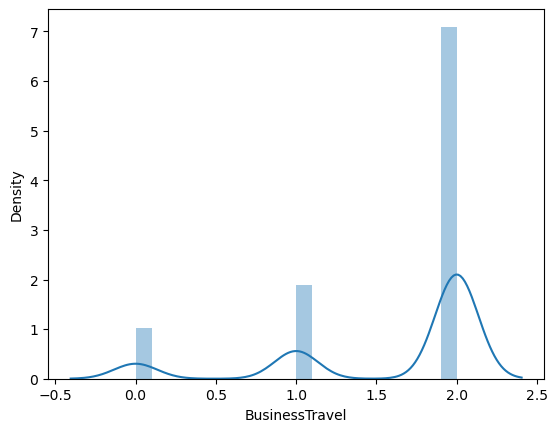

In [19]:
sns.distplot(encoded_df.BusinessTravel, bins=20)

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

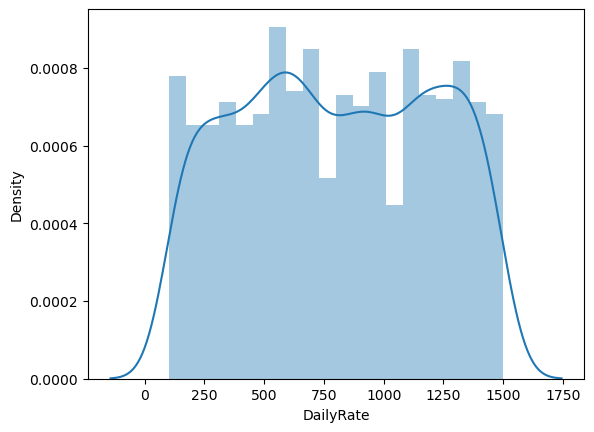

In [20]:
sns.distplot(encoded_df.DailyRate, bins=20)

<AxesSubplot:xlabel='Department', ylabel='Density'>

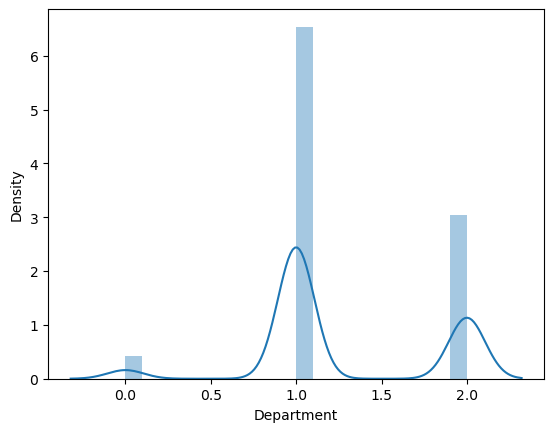

In [21]:
sns.distplot(encoded_df.Department, bins=20)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

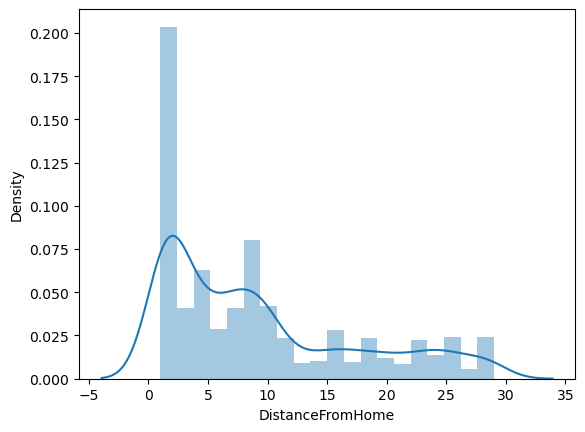

In [22]:
sns.distplot(encoded_df.DistanceFromHome, bins=20)

<AxesSubplot:xlabel='EducationField', ylabel='Density'>

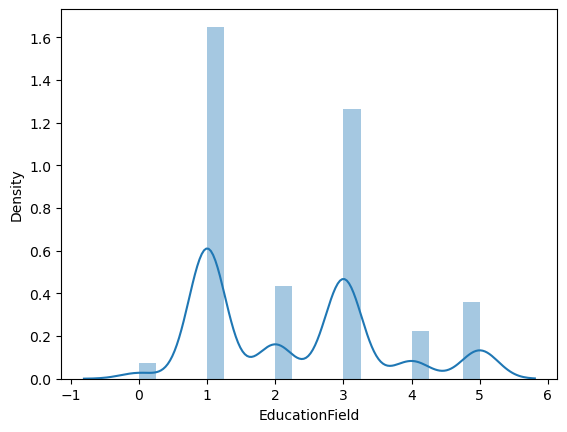

In [24]:
sns.distplot(encoded_df.EducationField, bins=20)

<AxesSubplot:xlabel='Gender', ylabel='Density'>

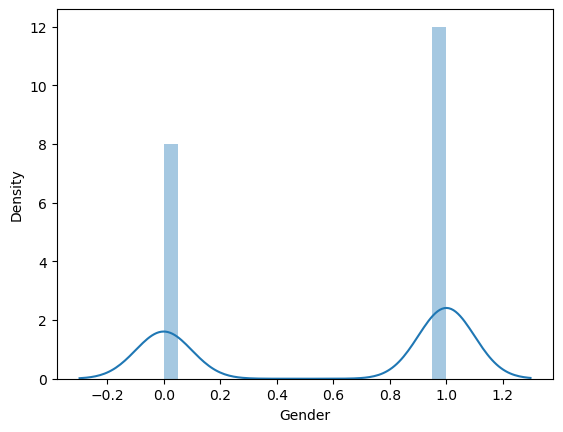

In [25]:
sns.distplot(encoded_df.Gender, bins=20)

<AxesSubplot:xlabel='JobRole', ylabel='Density'>

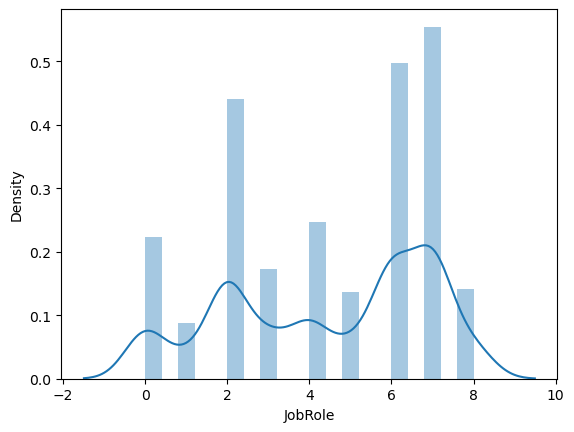

In [26]:
sns.distplot(encoded_df.JobRole, bins=20)

<AxesSubplot:xlabel='OverTime', ylabel='Density'>

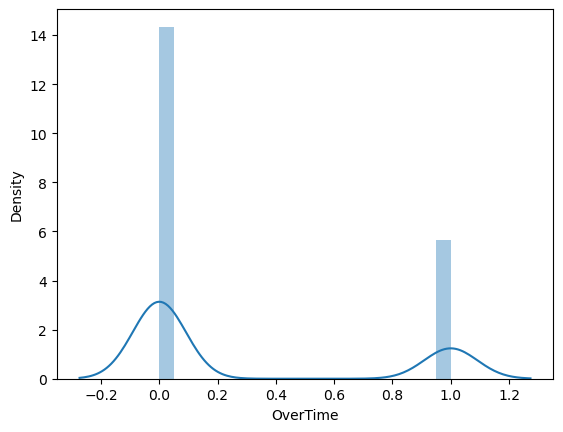

In [27]:
sns.distplot(encoded_df.OverTime, bins=20)

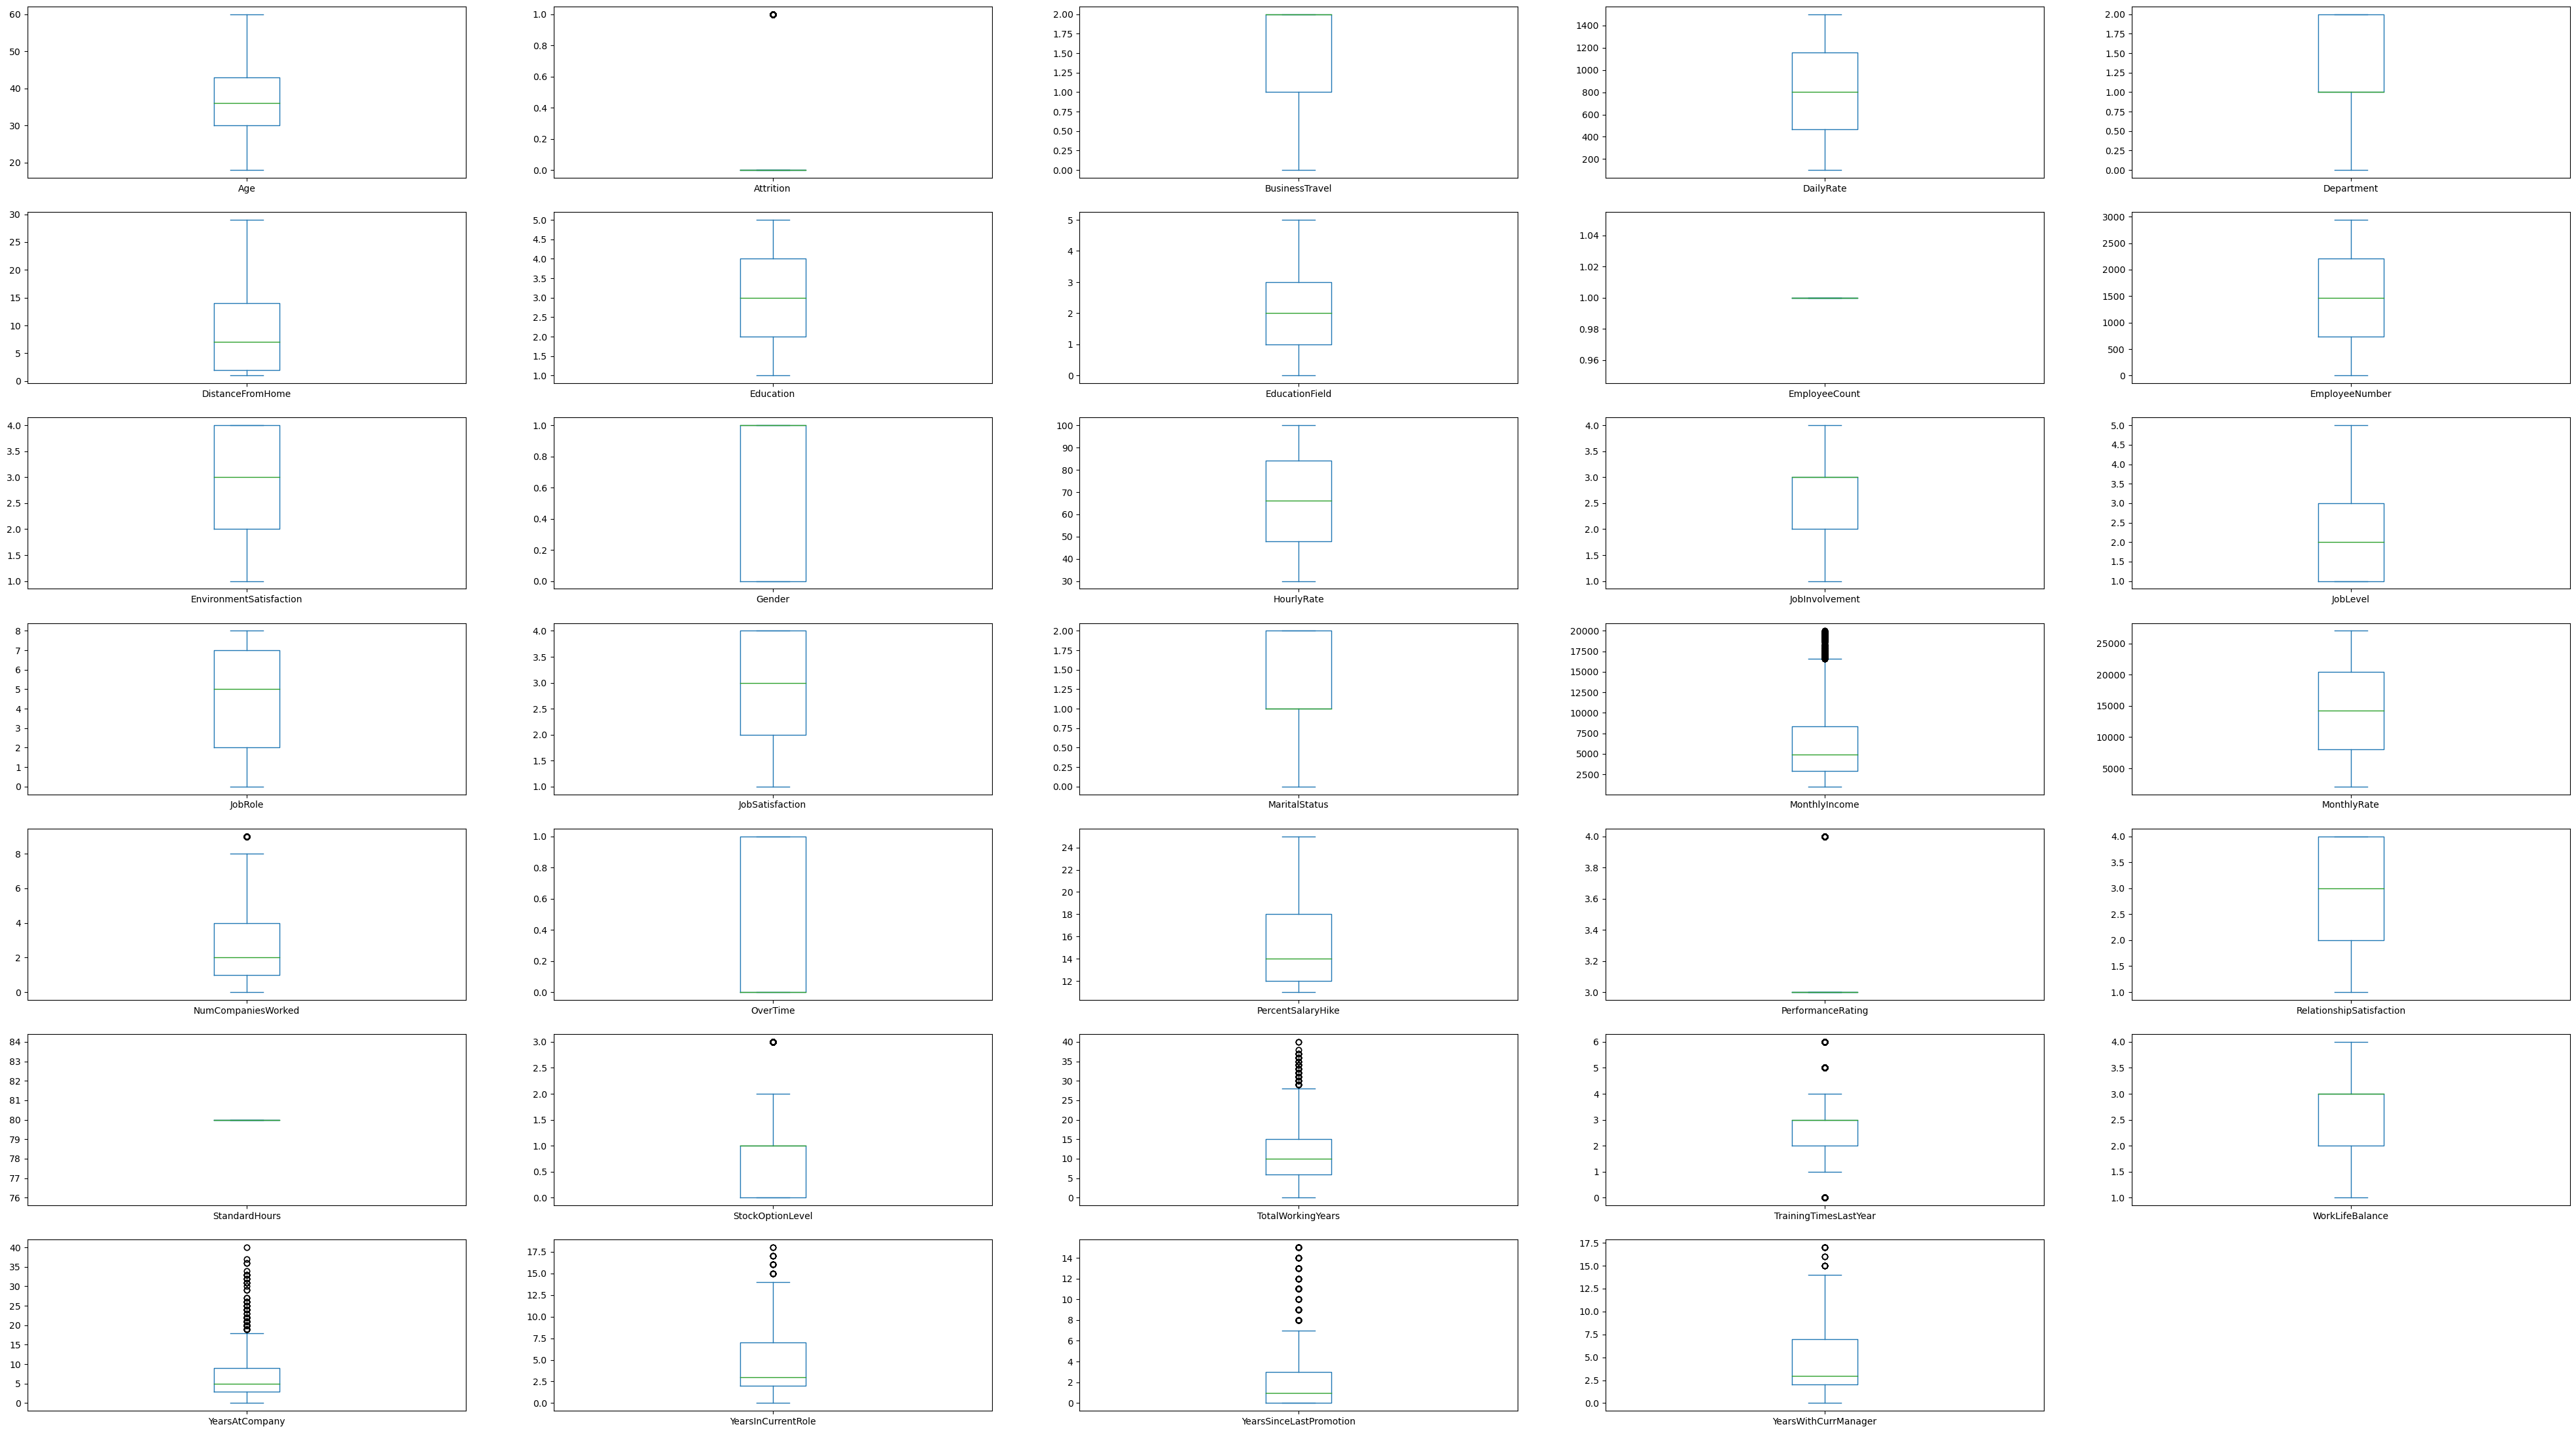

In [29]:
encoded_df.plot(kind='box', subplots=True, layout=(10,5), figsize=(50,40));

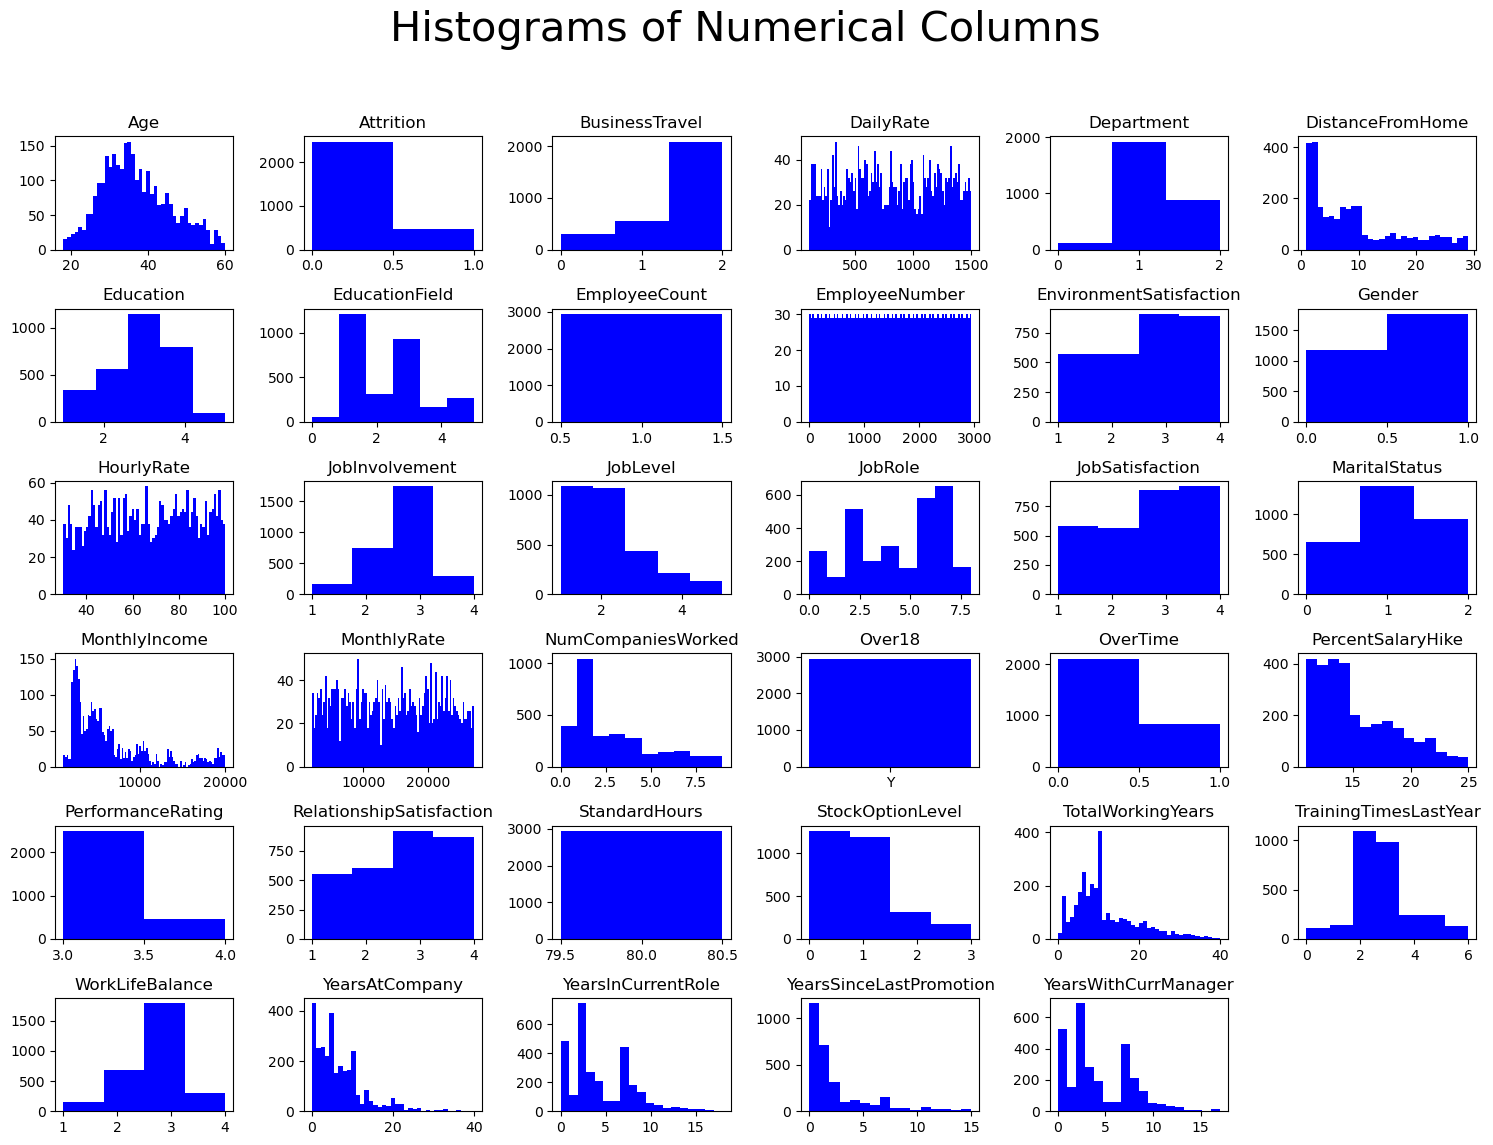

In [30]:
encoded_df
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=30)
for i in range(encoded_df.shape[1]):
    plt.subplot(6, 6, i + 1)
    f = plt.gca()
    f.set_title(encoded_df.columns.values[i])

    vals = np.size(encoded_df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(encoded_df.iloc[:, i], bins=vals, color='Blue')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<AxesSubplot:>

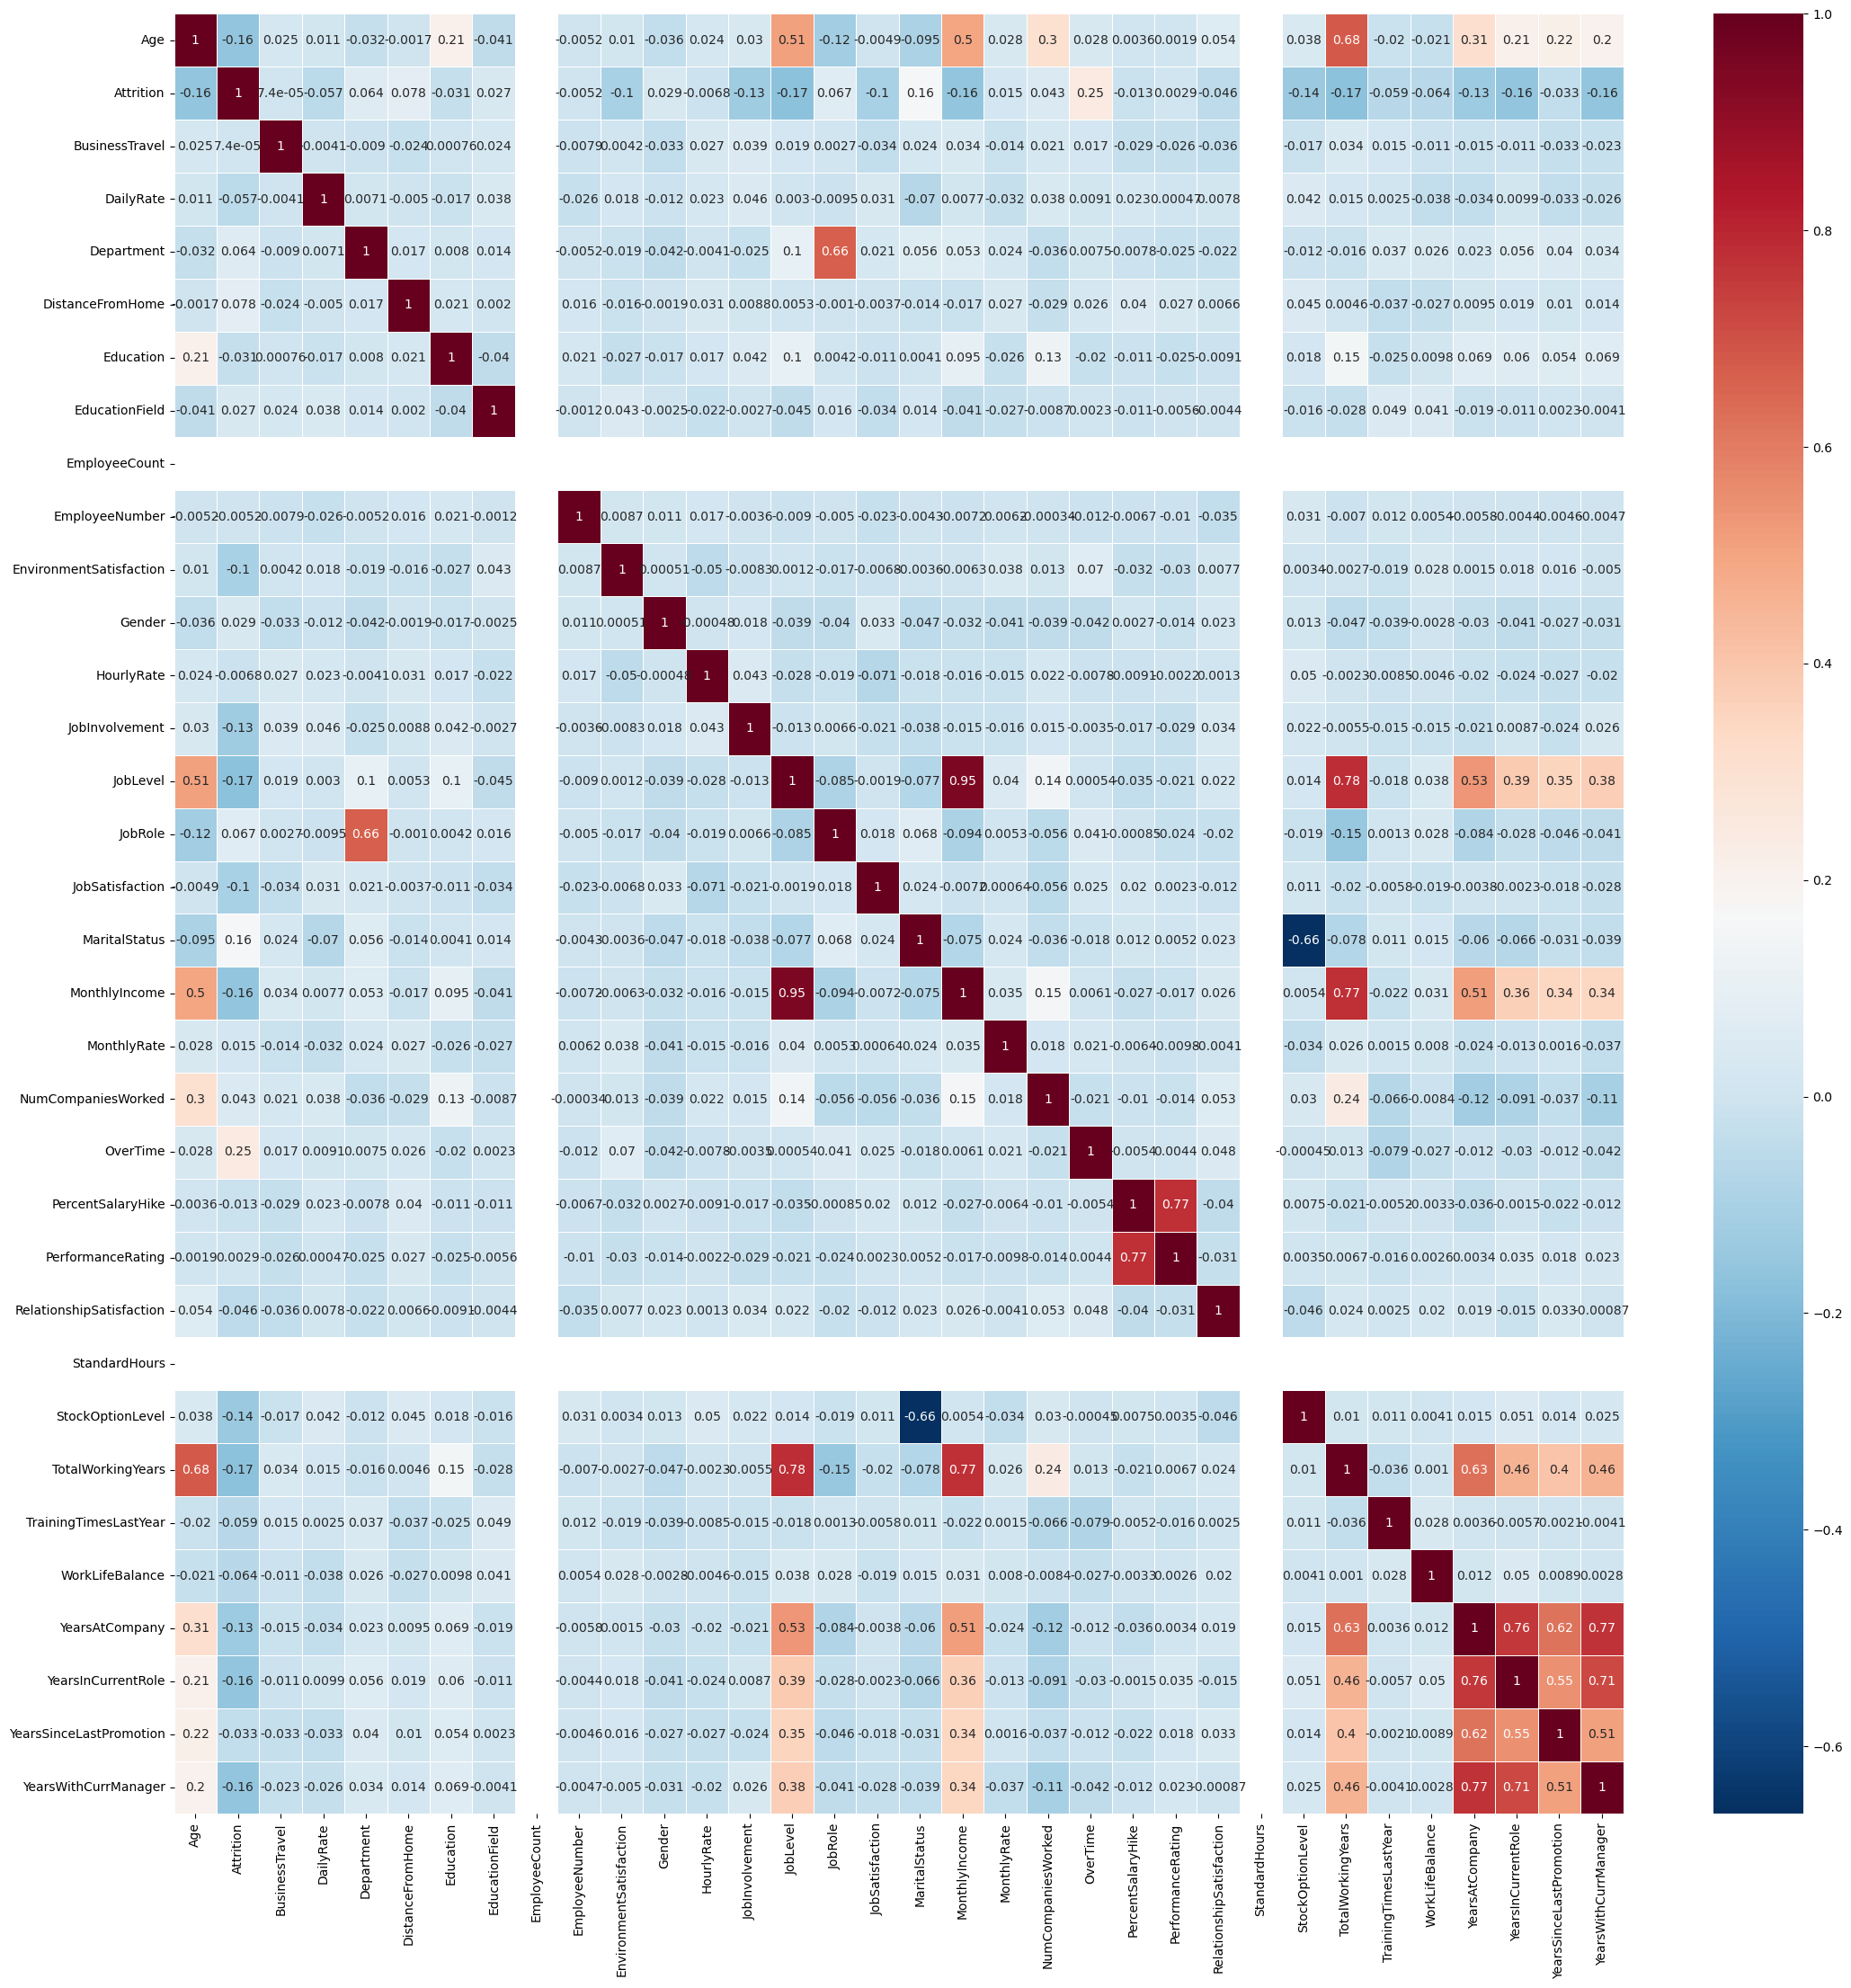

In [32]:
# After we changed all the categorical variables to numerical using mean encoding, 
# we can run pairwise correlation again to see the correlation between all the variables
pearson = encoded_df.corr(method='pearson')
pearson
plt.figure(figsize=(26, 26))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [33]:
# Picking the features that have absolute correlation value greater than 0.1 

final_df = encoded_df[['Attrition', 'Age', 'BusinessTravel', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [34]:
# Separating dataset into x & y, where y is the target variable

x= final_df.drop(['Attrition'], axis=1).values
y= final_df['Attrition'].values

In [35]:
# Split the data into train test

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [36]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [37]:
mean = np.mean(x, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(x, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


In [39]:
print(x[0:10,:])

[[ 4.46350404e-01  5.90048338e-01 -9.37413693e-01 -6.60530674e-01
   3.79672129e-01 -5.77875453e-02  1.03271569e+00  1.15325359e+00
   1.23682046e+00 -1.08349514e-01  1.59174553e+00 -9.32014389e-01
  -4.21642458e-01 -1.64613109e-01 -6.32958994e-02  2.45833995e-01]
 [ 1.32236521e+00 -9.13194394e-01 -9.37413693e-01  2.54624925e-01
  -1.02616674e+00 -5.77875453e-02  6.26374133e-01 -6.60853181e-01
  -1.33282084e-01 -2.91718590e-01 -6.28241122e-01  2.41988312e-01
  -1.64511401e-01  4.88507728e-01  7.64997621e-01  8.06541477e-01]
 [ 8.34299820e-03  5.90048338e-01  1.31667267e+00  1.16978053e+00
  -1.02616674e+00 -9.61486392e-01 -9.98992108e-01  2.46200205e-01
   1.23682046e+00 -9.37653691e-01  1.59174553e+00 -9.32014389e-01
  -5.50207987e-01 -1.14429437e+00 -1.16768726e+00 -1.15593471e+00]
 [-4.29664407e-01 -9.13194394e-01 -9.37413693e-01  1.16978053e+00
   3.79672129e-01 -9.61486392e-01  6.26374133e-01  2.46200205e-01
  -1.33282084e-01 -7.63633675e-01  1.59174553e+00 -9.32014389e-01
  -4.21

In [40]:
# Logistic Regression Model

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train,y_train)

LogisticRegression()

In [41]:
# Predictions

y_pred = logreg.predict(x_test)

In [42]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
# Performace & Accuracy

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[487,   2],
       [ 91,   8]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

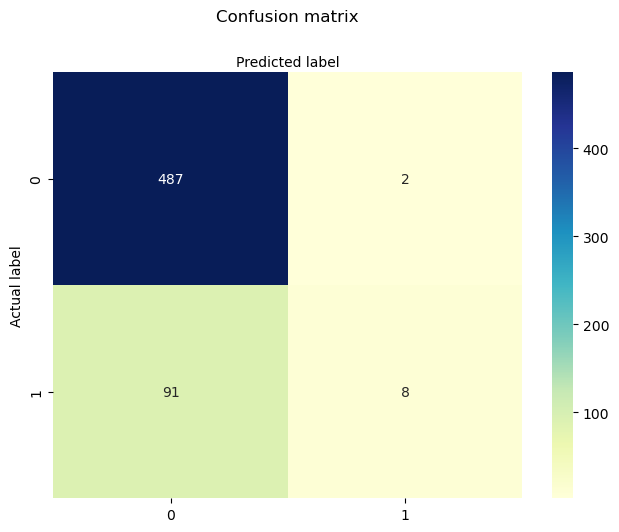

In [44]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8418367346938775
Precision: 0.8
Recall: 0.08080808080808081


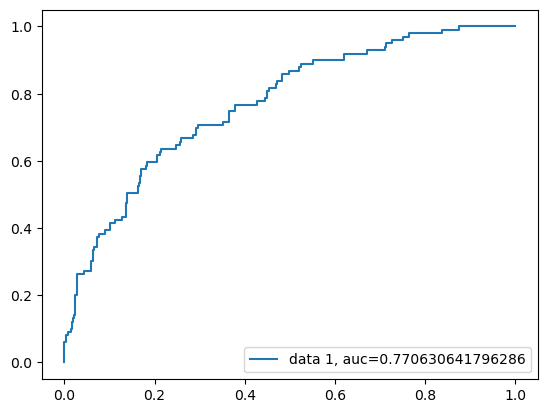

In [47]:
# Area Under Curve

y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [50]:
#Performance matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_dt

0.5383590506289894